### Chap2 Object-Oriented Programming

In [1]:
import numbers
import time
from math import sqrt
from abc import ABCMeta, abstractmethod
from typing import TypeVar, Union, Any

from random import randint
import matplotlib.pyplot as plt
%matplotlib inline


Num = TypeVar('Num', int, float)

#### Reinforcement

##### R-2.4
Write a Python class, Flower, that has three instance variables of type str,
int, and float, that respectively represent the name of the flower, its num-
ber of petals, and its price. Your class must include a constructor method
that initializes each variable to an appropriate value, and your class should
include methods for setting the value of each type, and retrieving the value
of each type.


Note that when we write our own class, we usually write the docstring and type at the end, so that the automatically generated documentation can be obtained through the `help(Flower)` command. However, for the convenience of solving the problem, we will sometimes omit it below. 

##### R-2.5&R-2.6&2.7
Consider the credit card class below 

In [30]:
class CreditCard:
  """A consumer credit card."""
  
  def __init__(self, customer, bank, acnt, limit):
    """Create a new credit card instance.

    The initial balance is zero.

    customer  the name of the customer (e.g., 'John Bowman')
    bank      the name of the bank (e.g., 'California Savings')
    acnt      the acount identifier (e.g., '5391 0375 9387 5309')
    limit     credit limit (measured in dollars)
    """
    self._customer = customer
    self._bank = bank
    self._account = acnt
    self._limit = limit
    self._balance = 0

  def get_customer(self):
    """Return name of the customer."""
    return self._customer
    
  def get_bank(self):
    """Return the bank's name."""
    return self._bank

  def get_account(self):
    """Return the card identifying number (typically stored as a string)."""
    return self._account

  def get_limit(self):
    """Return current credit limit."""
    return self._limit

  def get_balance(self):
    """Return current balance."""
    return self._balance

  def charge(self, price):
    """Charge given price to the card, assuming sufficient credit limit.

    Return True if charge was processed; False if charge was denied.
    """
    if price + self._balance > self._limit:  # if charge would exceed limit,
      return False                           # cannot accept charge
    else:
      self._balance += price
      return True

  def make_payment(self, amount):
    """Process customer payment that reduces balance."""
    self._balance -= amount

R-2.5: 
- Revise the charge method and make payment methods of the CreditCard class to ensure that the caller sends a number  as a parameter.


R-2.6: 
- If the parameter to the make payment method of the CreditCard class
were a negative number, that would have the effect of raising the balance
on the account. Revise the implementation so that it raises a ValueError if
a negative value is sent.

R-2.7:
- The CreditCard class initializes the balance of a new account to zero. Modify that class so that a new account can be given a nonzero balance using an optional fifth parameter to the constructor. The
four-parameter constructor syntax should continue to produce an account
with zero balance.

In [32]:
c = CreditCard("name", "SSS", acnt="4444",limit=1000,balance=100)
c.make_payment(30)

Note that here we are nothing more than adding an anomaly detection. The parameters given by the detection are not numbers. Here, for the two detections, we give two different methods, `isinstance(price, (int, float, complex))` and `isinstance(amount, numbers.Number)`, both are acceptable, refer to [here](https://stackoverflow.com/questions/11204789/how-to-properly-use-pythons-isinstance-to-check-if- a-variable-is-a-number). 

##### R-2.9 -> R-2.15

The main thing is to define a `Vector` class and implement some operations on the vector.

Note the following method of using type hint inside the class, refer to [Type of the same class inside the class](https://github.com/python/mypy/issues/3661)

##### R-2.16
Our Range class, from Section 2.3.5, relies on the formula
max(0, (stop − start + step − 1) // step)
to compute the number of elements in the range. It is not immediately evident why this formula provides the correct calculation, even if assuming
a positive step size. Justify this formula, in your own words.

$$max(0, (stop - start + step - 1) // step)$$
Simplify it, the previous 1 can be regarded as the first value, 
$$max(0, 1 + (stop - start - 1) // step)$$
After that, $(stop - start) // step$ should have been added, but considering that it does not include the value at `stop`, considering that the minimum step size is 1 (must be an integer), the actual termination The point is `stop-1`, so add $(stop - start - 1) // step$ 

##### R-2.18
Give a short fragment of Python code that uses the progression classes
from Section 2.4.2 to find the 8 th value of a Fibonacci progression that
starts with 2 and 2 as its first two values.

In [35]:
# code in 2.4.2
class Progression:
    def __init__(self, start=0):
        self._current = start
    
    def _advance(self):
        self._current += 1

    def __next__(self):
        if self._current is None:
            raise StopIteration
        else:
            answer = self._current
            self._advance()
            return answer

    def __iter__(self):
        return self

    def print_progression(self, n):
        print(' '.join(str(next(self)) for i in range(n)))


class FibonacciProgression(Progression):
    def __init__(self, first=0, second=1):
        # initialize base class
        # start progression at first
        super().__init__(first)
        self._prev = second - first
    
    def _advance(self):
        self._prev, self._current = self._current, self._current + self._prev

2 2 4 6 10 16 26 42


From this, the answer to the question is 42 (appears, the ultimate answer to the universe :-) 

##### R-2.19
When using the ArithmeticProgression class of Section 2.4.2 with an increment of 128 and a start of 0, how many calls to next can we make
before we reach an integer of $2^{63}$ or larger?

72057594037927936

#### Creativity

##### C-2.25
Exercise R-2.12 uses the mul method to support multiplying a Vector
by a number, while Exercise R-2.14 uses the mul method to support
computing a dot product of two vectors. Give a single implementation of
Vector. mul that uses run-time type checking to support both syntaxes
u v and u k, where u and v designate vector instances and k represents
a number.

##### C-2.26 
The SequenceIterator class of Section 2.3.4 provides what is known as a
forward iterator. Implement a class named ReversedSequenceIterator that
serves as a reverse iterator for any Python sequence type. The first call to
next should return the last element of the sequence, the second call to next
should return the second-to-last element, and so forth.

In [39]:
rev_seq = ReversedSequenceIterator([1, 3, 5])
for i in rev_seq:
    print(i)

5
3
1


##### C-2.27 
In Section 2.3.5, we note that our version of the Range class has implicit support for iteration, due to its explicit support of both len
and getitem . The class also receives implicit support of the Boolean
test, “k in r” for Range r. This test is evaluated based on a forward iteration through the range, as evidenced by the relative quickness of the test
2 in Range(10000000) versus 9999999 in Range(10000000). Provide a
more efficient implementation of the contains method to determine
whether a particular value lies within a given range. The running time of
your method should be independent of the length of the range.

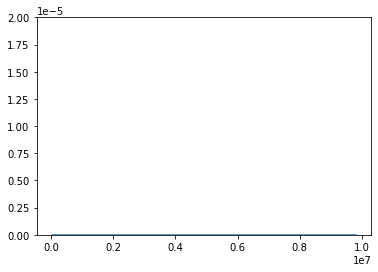

In [3]:
r = Range(0, 10000000, 1)
r.test_contains()

In [19]:
# Test environment (need to install py-cupinfo library first) 
import cpuinfo
cpuinfo.get_cpu_info()['brand_raw']

'Intel(R) Core(TM) i7-8650U CPU @ 1.90GHz'

##### C-2.31
Write a Python class that extends the Progression class so that each value
in the progression is the absolute value of the difference between the previous two values. You should include a constructor that accepts a pair of
numbers as the first two values, using 2 and 200 as the defaults.

In [21]:
t = AbsdiffPrograssion()
t.print_progression(10)

2 200 198 2 196 194 2 192 190 2


##### C-2.32
Write a Python class that extends the Progression class so that each value
in the progression is the square root of the previous value. (Note that
you can no longer represent each value with an integer.) Your construc-
tor should accept an optional parameter specifying the start value, using
65, 536 as a default.

In [25]:
s = SquareRootProgression()
s.print_progression(10)

65536 256.0 16.0 4.0 2.0 1.4142135623730951 1.189207115002721 1.0905077326652577 1.0442737824274138 1.0218971486541166
